In [49]:
import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [50]:
from keras.datasets import mnist

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [51]:
xtrain.shape

(60000, 28, 28)

In [52]:
ytrain.shape

(60000,)

In [53]:
xtest.shape

(10000, 28, 28)

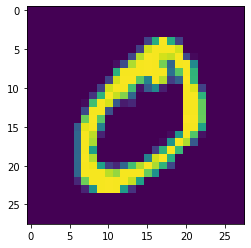

In [54]:
plt.imshow(xtrain[1])

In [55]:
num_pixels=xtrain.shape[1]*xtrain.shape[2]
xtrain=xtrain.reshape(xtrain.shape[0], num_pixels).astype('float32')
xtest=xtest.reshape(xtest.shape[0], num_pixels).astype('float32')

In [56]:
xtrain=xtrain/255
xtest=xtest/255

In [57]:
ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)

num_classes=ytest.shape[1]
print(num_classes)

10


#Building the Model

In [58]:
def classification():
  model=Sequential()

  model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels, )))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [59]:
model=classification()
model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=10, verbose=1)
scores = model.evaluate(xtest, ytest, verbose=0)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1868 - accuracy: 0.9437 - val_loss: 0.0918 - val_accuracy: 0.9722
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0769 - accuracy: 0.9757 - val_loss: 0.0761 - val_accuracy: 0.9761
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0534 - accuracy: 0.9833 - val_loss: 0.0912 - val_accuracy: 0.9734
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0405 - accuracy: 0.9867 - val_loss: 0.0792 - val_accuracy: 0.9756
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0308 - accuracy: 0.9901 - val_loss: 0.0809 - val_accuracy: 0.9778
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0249 - accuracy: 0.9919 - val_loss: 0.0733 - val_accuracy: 0.9799
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0233 - accuracy: 0.9926 - val_loss: 0.0820 - val_ac

In [60]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))        

Accuracy: 0.982200026512146% 
 Error: 0.017799973487854004


In [61]:
model.save('mnist_classification.h5')

In [62]:
from keras.models import load_model
pretrained_model = load_model('mnist_classification.h5')